In [97]:
import pandas as pd

metasamples = pd.read_csv("samples.tsv", sep="\t", header=None)
metasamples.columns = ['PATIENT_ID', 'GENDER', "TUMOR", "SAMPLE_ID", "LANE", "FASTQ1", "FASTQ2"]
metasamples = metasamples[metasamples.LANE == 1]

In [98]:
import numpy as np
from collections import Counter, defaultdict
num_samples = metasamples.shape[0]
num_samples_tumor = np.sum(metasamples['TUMOR'] == 1)
num_samples_normal = np.sum(metasamples['TUMOR'] == 0)
patients_samples = defaultdict(int)
patients_samples2 = defaultdict(int)
for index, row in metasamples.iterrows():
    if row['TUMOR'] == 0:
        patients_samples[row['PATIENT_ID']] += 1
    else:
        patients_samples2[row['PATIENT_ID']] += 1
num_samples_paired = np.sum([patients_samples2[p] for p in patients_samples.keys()])
symbols = metasamples.groupby('PATIENT_ID')
unique_patients = [x[0] for x in symbols.groups.values()]
num_men = np.sum(metasamples.loc[unique_patients, 'GENDER'] == 'XX')
num_women = np.sum(metasamples.loc[unique_patients, 'GENDER'] == 'XY')
num_patients = len(unique_patients)
num_patients_paired = len(patients_samples)
sample_types = Counter([x.split('_')[-1] for x in metasamples['SAMPLE_ID']])

In [99]:
print(num_patients)
print(num_patients_paired)
print(num_samples)
print(num_samples_tumor)
print(num_samples_paired)

40
18
128
110
68


<IPython.core.display.Javascript object>


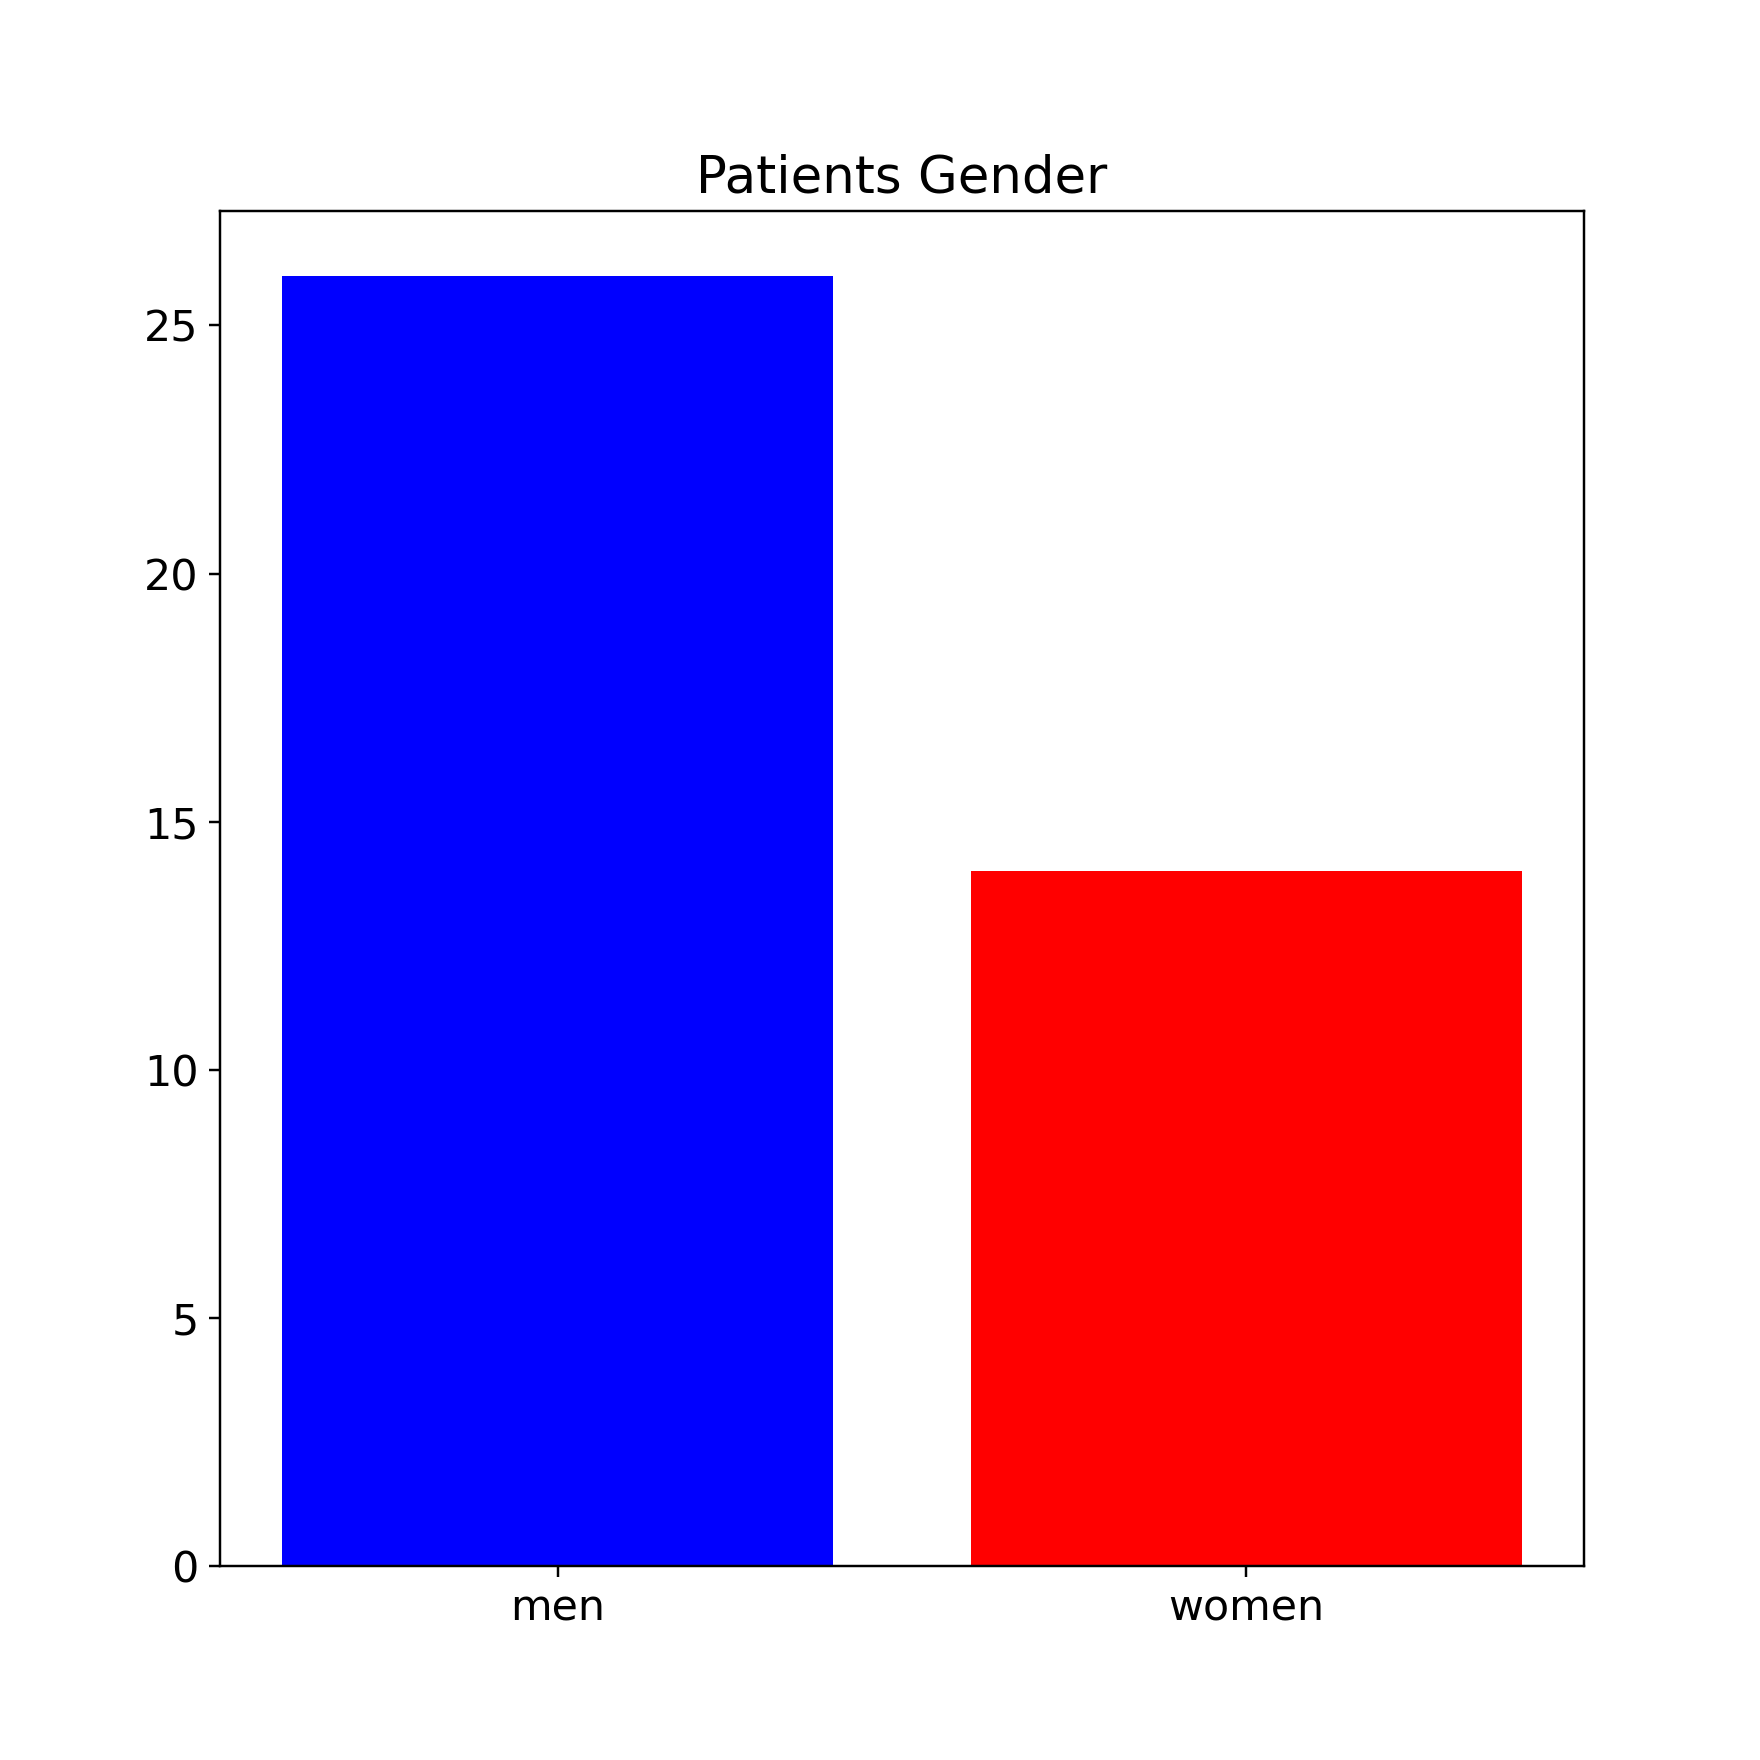

In [100]:
%matplotlib notebook

from collections import Counter
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 14})

data = [num_men, num_women]
labels = ['men', 'women']
x = np.arange(2)

fig, ax = plt.subplots()
plt.bar(x, data, color=['blue', 'red'])
plt.xticks(x, labels)
plt.title('Patients Gender')
plt.show()
plt.savefig("gender.png")

<IPython.core.display.Javascript object>


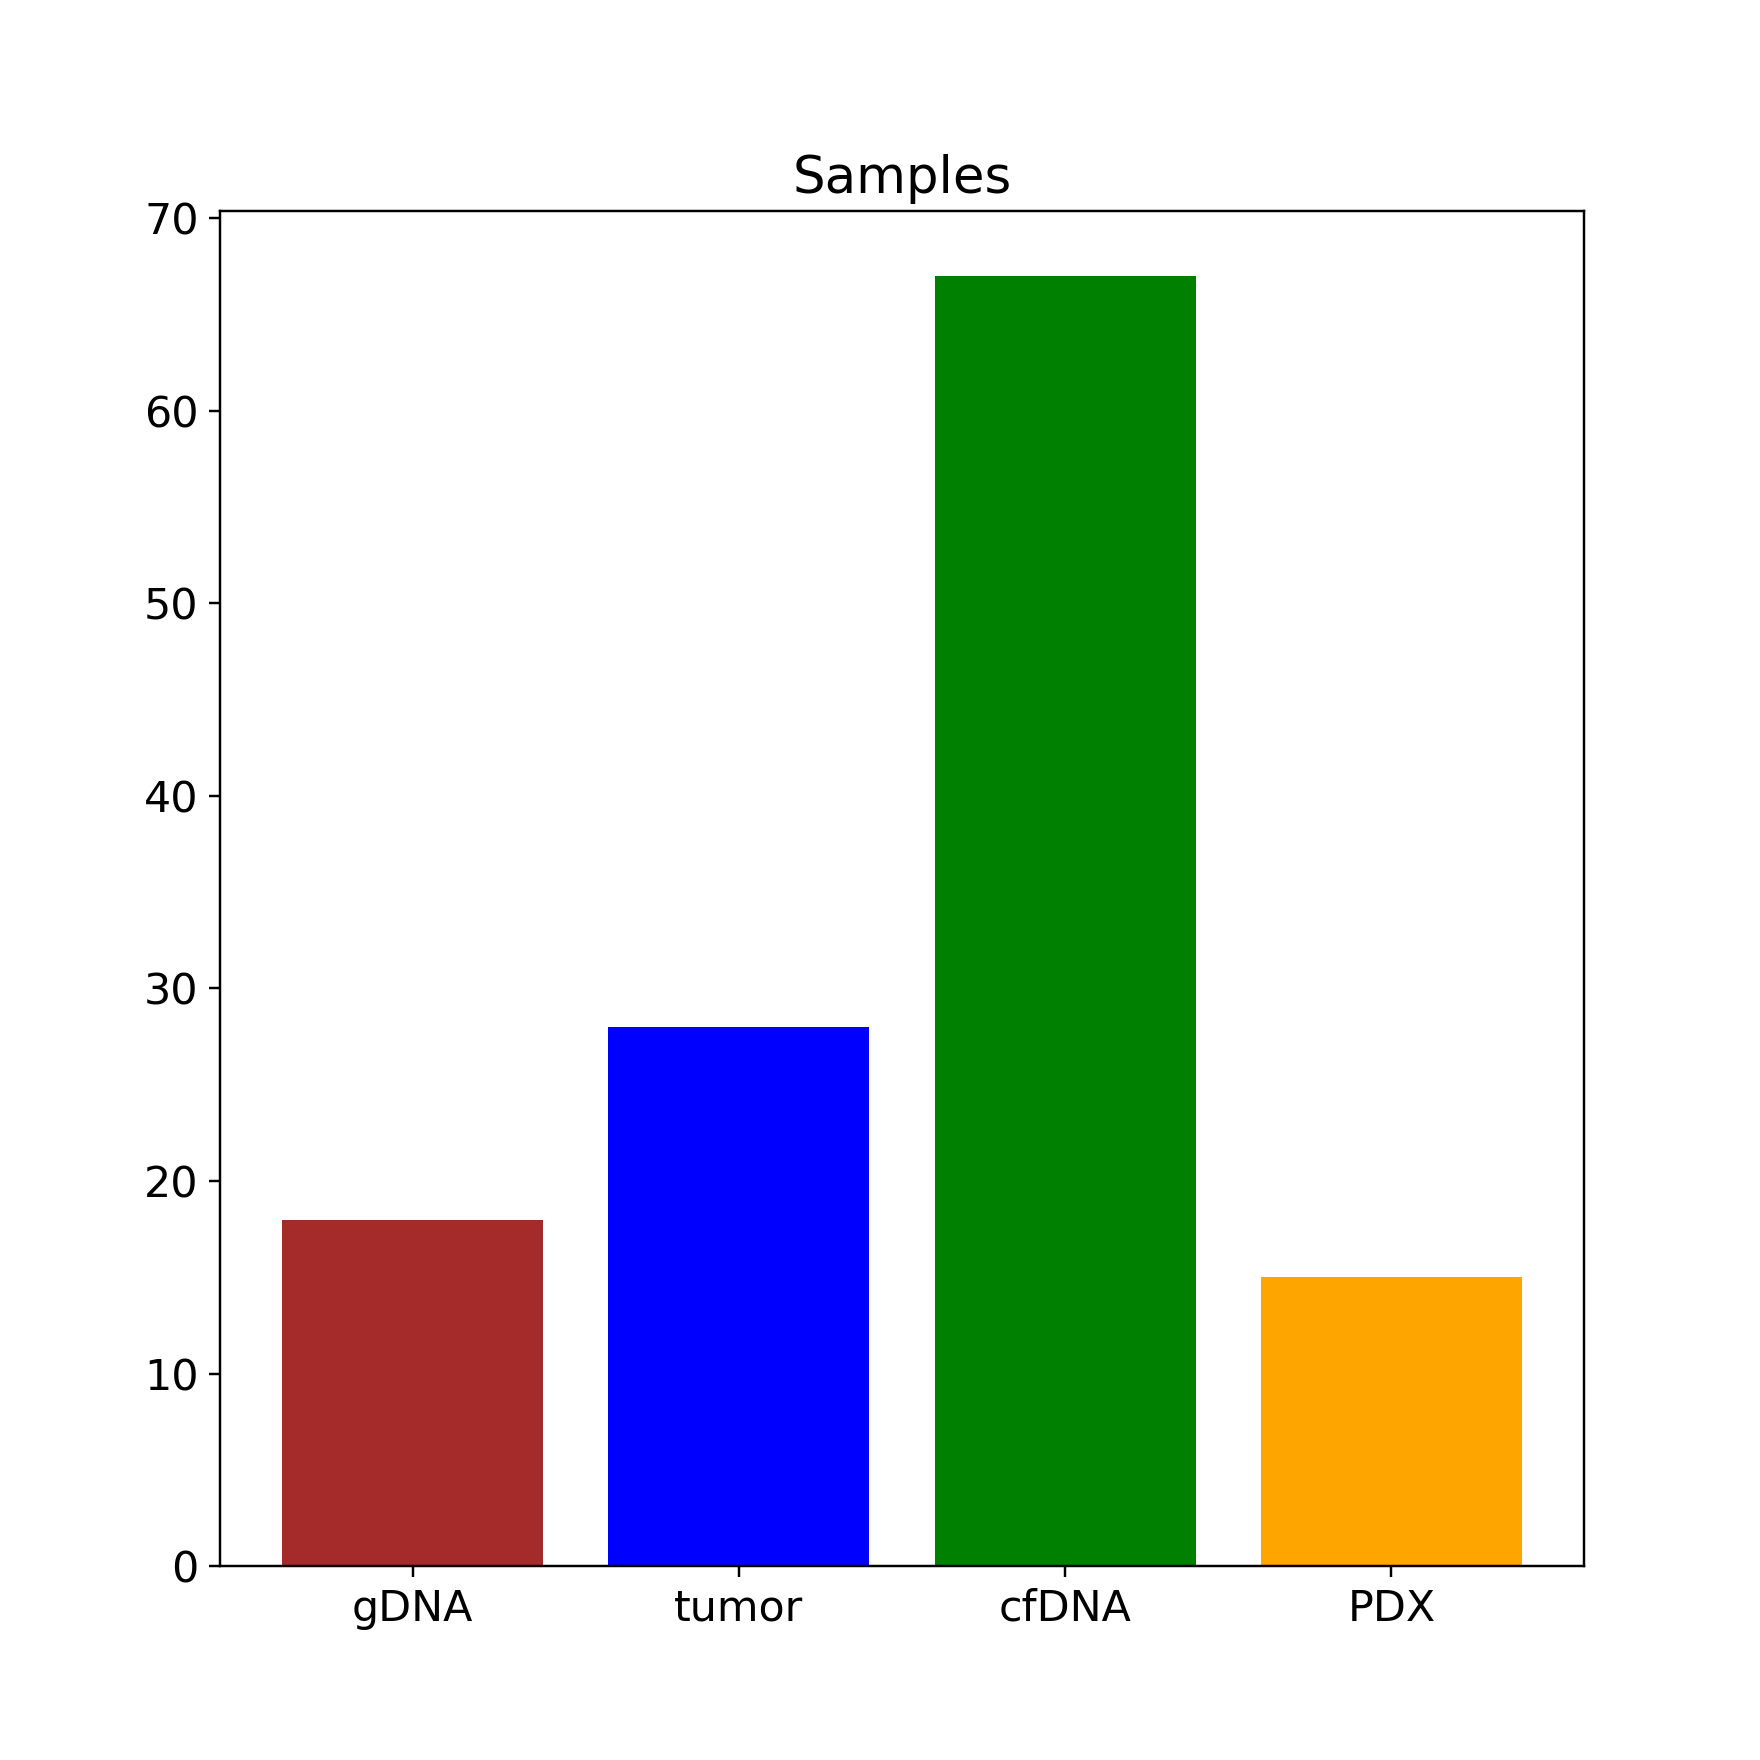

In [101]:
data = [v for v in sample_types.values()]
labels = [k for k in sample_types.keys()]
x = np.arange(len(sample_types))

fig, ax = plt.subplots()
plt.bar(x, data, color=['brown', 'blue', 'green', 'orange'])
plt.xticks(x, labels)
plt.title('Samples')
plt.show()
plt.savefig("samples.png")

<IPython.core.display.Javascript object>


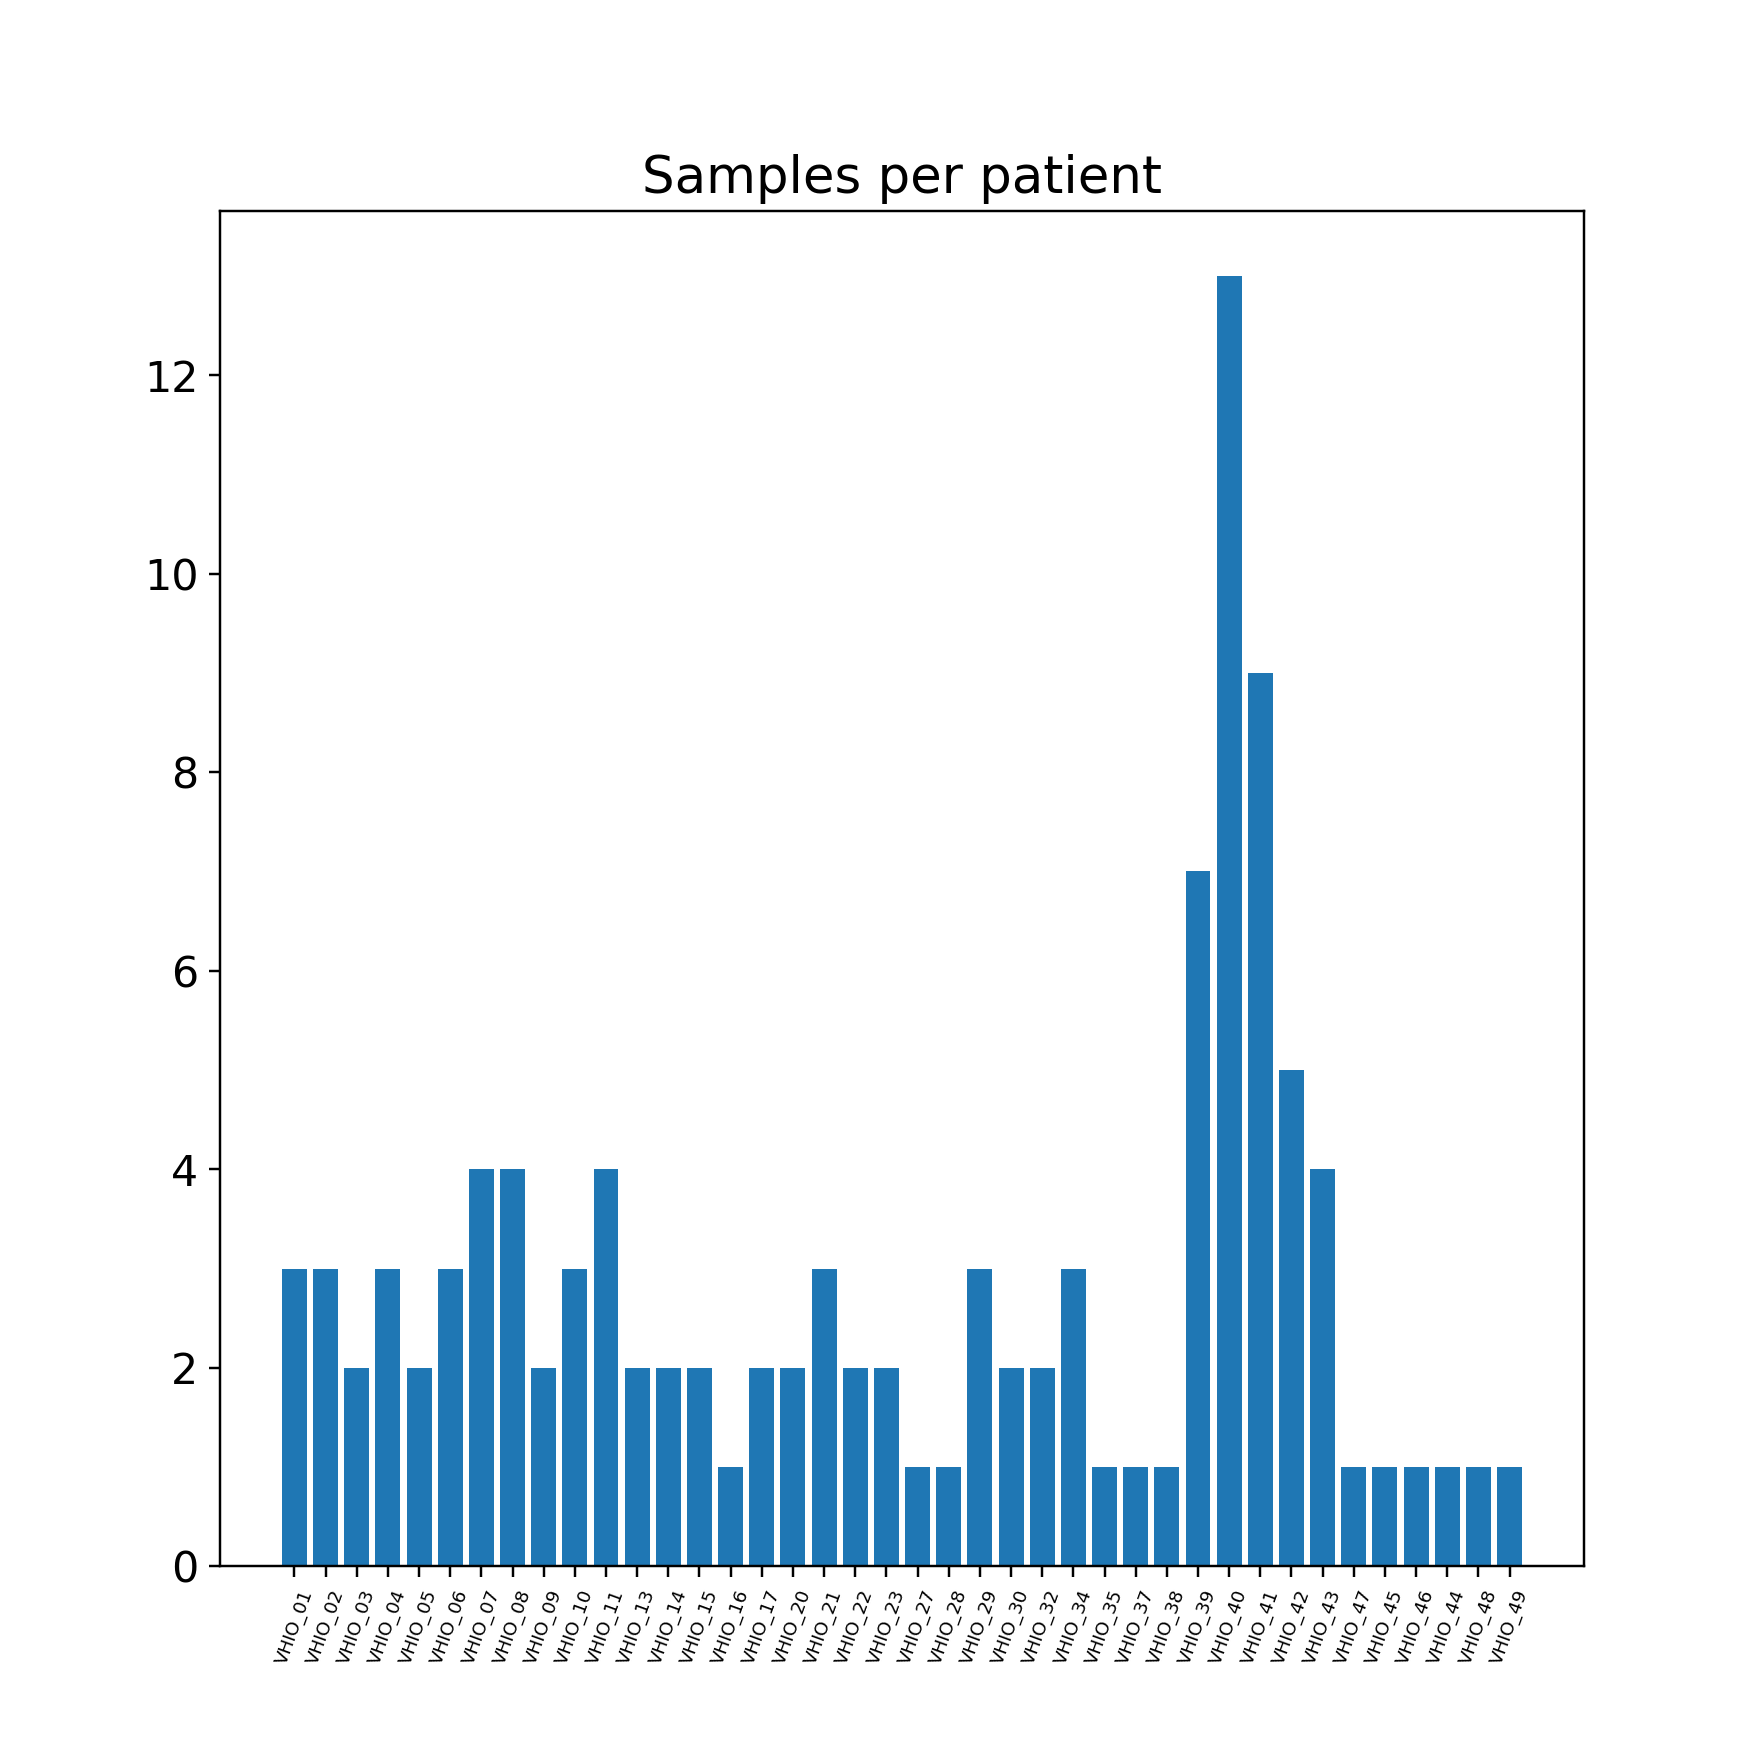

In [102]:
data = [v for v in patients_samples2.values()]
labels = [k for k in patients_samples2.keys()]
x = np.arange(len(patients_samples2))

fig, ax = plt.subplots()
plt.bar(x, data)
plt.xticks(x, labels, fontsize=6, rotation=70)
plt.title('Samples per patient')
plt.show()
plt.savefig("samples2.png")

In [63]:
num_samples_paired

68

In [68]:
qc = pd.read_csv("summary_qc_table.txt", sep="\t", index_col=0)

In [69]:
qc

,total_reads,mapped_reads,mean_mapping_quality,mean_coverage,percentage_aligned,duplicated_reads,optical_duplicated_reads,percentage_duplicated
Sample,,,,,,,,
1000_57_cfDNA,327763611.0,327549588.0,57.3107,77.2231,99.934702,41279901.0,861997.0,0.243718
1033_35_cfDNA,523848978.0,523181762.0,57.1493,167.0312,99.872632,108489359.0,3113647.0,0.403202
1123_3_cfDNA,543580505.0,542977068.0,57.1467,229.6779,99.888988,71245658.0,2745082.0,0.255311
1132_52_cfDNA,255665307.0,255395720.0,57.2424,37.9605,99.894555,52237134.0,651682.0,0.395518
1261_2_cfDNA,596918238.0,596147866.0,57.1459,262.8477,99.870942,88871579.0,3121870.0,0.290074
...,...,...,...,...,...,...,...,...
PDX_IGO_E200_109_PDX,261922171.0,261854293.0,57.4180,292.8381,99.974085,18620164.0,731072.0,0.138308
T074_PDX,114136907.0,114093638.0,57.2472,78.3408,99.962090,18907333.0,44503.0,0.323600
T160_PDX,144393489.0,144361864.0,57.2540,112.2643,99.978098,15714246.0,29643.0,0.212718


<IPython.core.display.Javascript object>


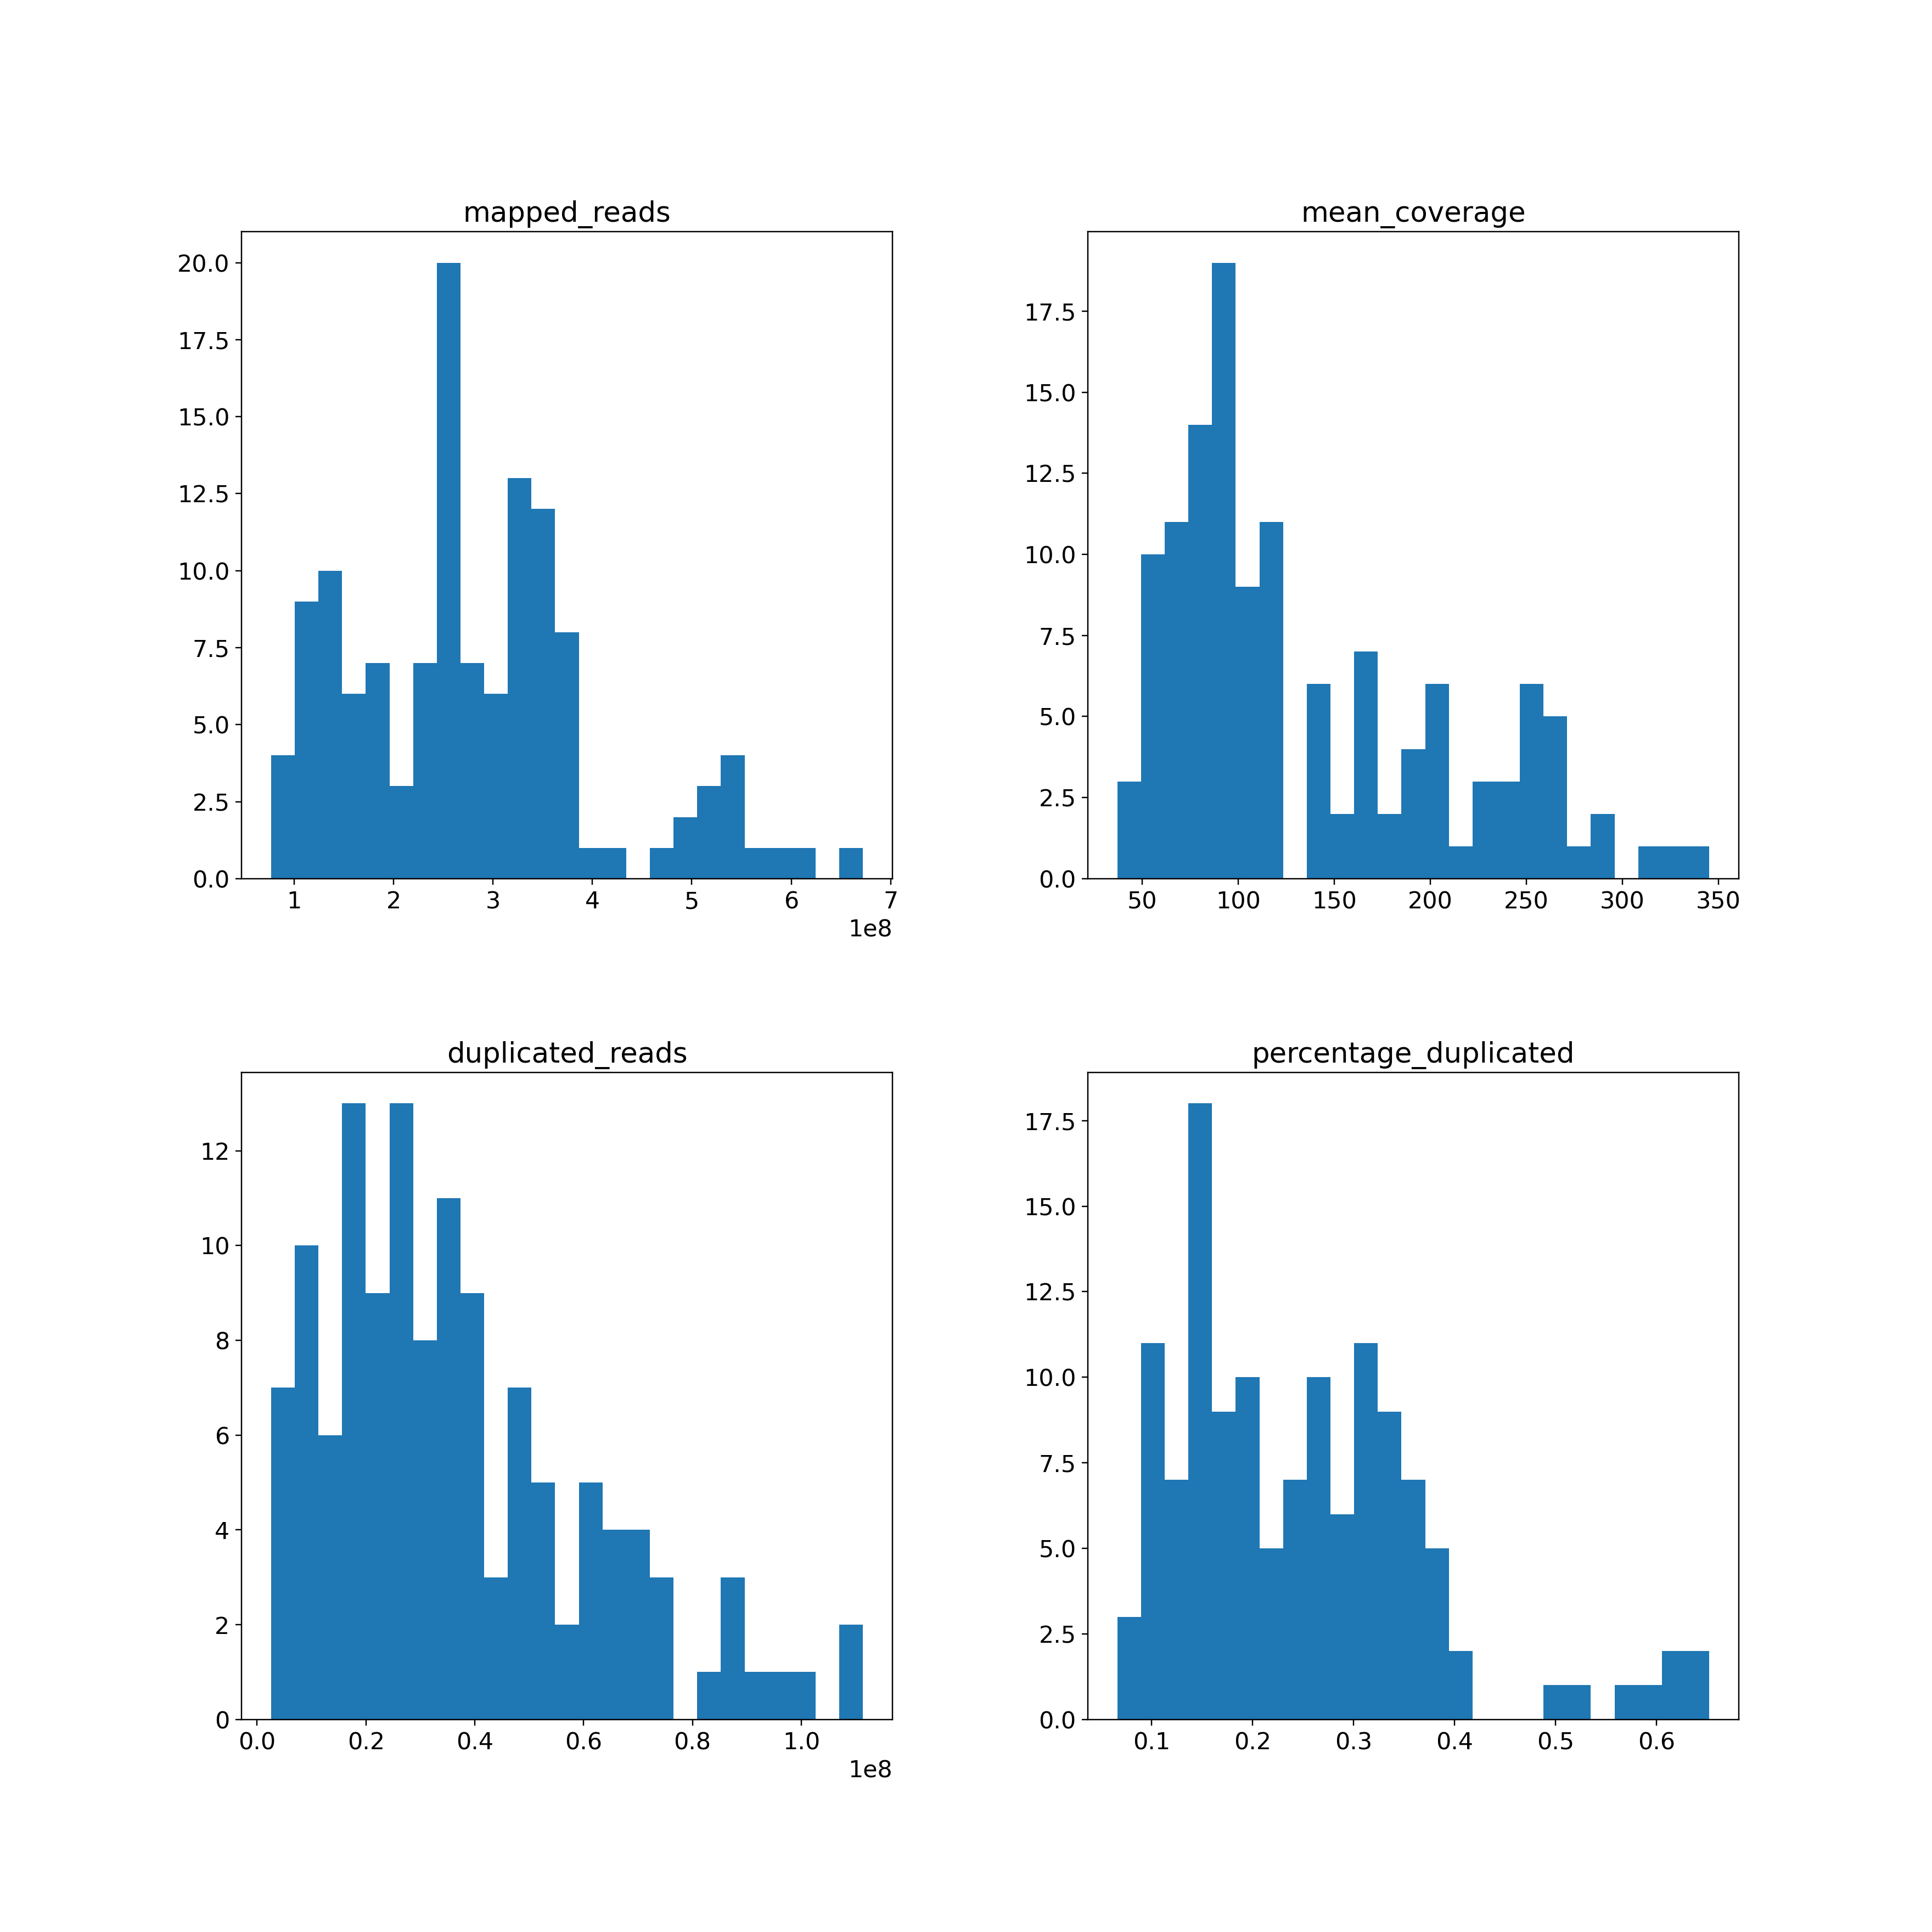

/Users/jfnavarro/opt/anaconda3/envs/hla/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
fig = plt.figure(figsize = (16, 16))
ax = fig.gca()
qc.loc[:,['mapped_reads', 'mean_coverage', 'duplicated_reads', 'percentage_duplicated']].hist(ax=ax, grid=False, bins=25)
plt.show()
plt.savefig("qc.png")

<IPython.core.display.Javascript object>


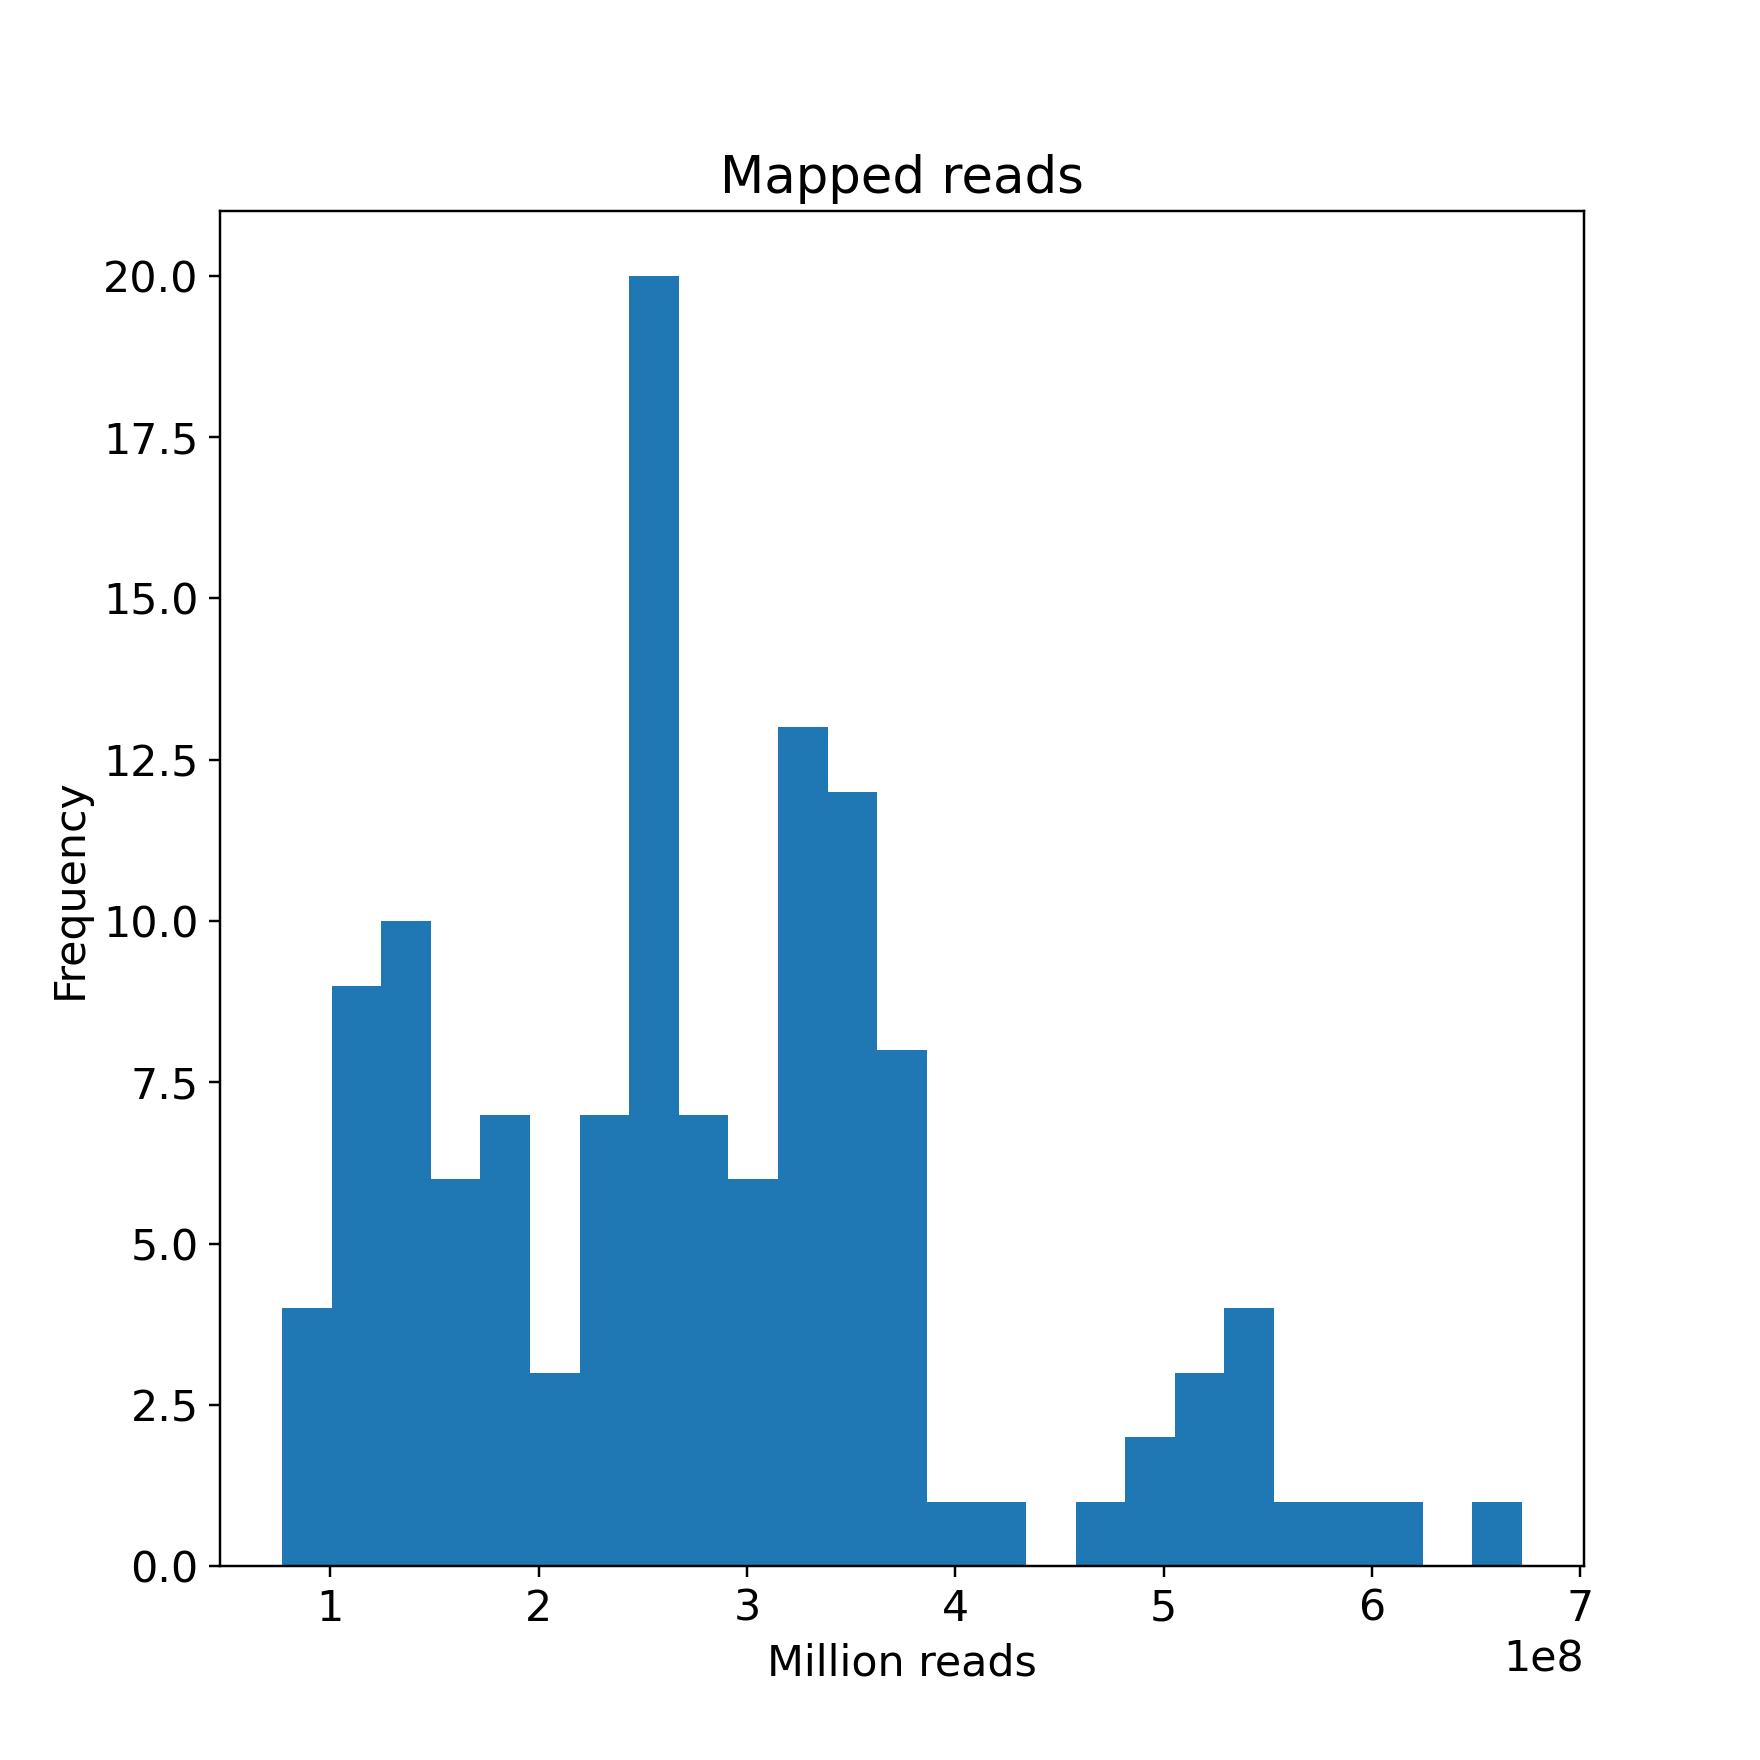

In [82]:
fig, ax = plt.subplots()
labels = qc.index
x = qc['mapped_reads']
plt.hist(x, bins=25)
plt.title('Mapped reads')
plt.ylabel('Frequency')
plt.xlabel('Million reads')
plt.show()
plt.savefig("mapped.png")